### Setup Environment:

In [2]:
from src.embeddings import get_embeddings_df, load_data, split_dataset, train_and_evaluate_model

# Class weights
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Models
# Random forest
from sklearn.ensemble import RandomForestClassifier
# Logistic regression
from sklearn.linear_model import LogisticRegression
# Support vector machine
from sklearn.svm import SVC
# Decision tree
from sklearn.tree import DecisionTreeClassifier

## Embeddings Generation

* **Batch Size:** Images per batch to convert to embeddings (Adjust depending on your memory)

* **Path:** Path to the images

* **Output Directory:** Directory to save the embeddings

* **Backbone:** Select a backbone from the list of possible backbones:
    * 'dinov2_small'
    * 'dinov2_base'
    * 'dinov2_large'
    * 'dinov2_giant'
    * 'clip_base',
    * 'clip_large',
    * 'convnextv2_tiny'
    * 'convnextv2_base'
    * 'convnextv2_large'
    * 'convnext_tiny'
    * 'convnext_small'
    * 'convnext_base'
    * 'convnext_large'
    * 'swin_tiny'
    * 'swin_small'
    * 'swin_base'
    * 'vit_base'
    * 'vit_large'
    * 'retfound'

In [3]:
# Foundational Models
dino_backbone = ['dinov2_small', 'dinov2_base', 'dinov2_large', 'dinov2_giant']

clip_backbone = ['clip_base', 'clip_large']

# ImageNet:

### Convnext
convnext_backbone = ['convnextv2_tiny', 'convnextv2_base', 'convnextv2_large'] + ['convnext_tiny', 'convnext_small', 'convnext_base', 'convnext_large']

### Swin Transformer
swin_transformer_backbone = ['swin_tiny', 'swin_small', 'swin_base']

### ViT
vit_backbone = ['vit_base', 'vit_large']

retfound_backbone = ['retfound']

backbones = dino_backbone + clip_backbone + convnext_backbone + swin_transformer_backbone + vit_backbone + retfound_backbone

backbones

['dinov2_small',
 'dinov2_base',
 'dinov2_large',
 'dinov2_giant',
 'clip_base',
 'clip_large',
 'convnextv2_tiny',
 'convnextv2_base',
 'convnextv2_large',
 'convnext_tiny',
 'convnext_small',
 'convnext_base',
 'convnext_large',
 'swin_tiny',
 'swin_small',
 'swin_base',
 'vit_base',
 'vit_large',
 'retfound']

In [ ]:
batch_size = 32
path = 'data/images/'
backbone = 'dinov2_base'
out_dir = 'Embeddings'

get_embeddings_df(batch_size=batch_size, path=path, backbone=backbone, directory=out_dir)

## Evaluate the Embeddings

In [ ]:
def run_experiments(LABELS_PATH, LABEL, EMBEDDINGS_BACKBONE, EMBEDDINGS_DIR, TEST_SIZE, CLASS_WEIGTHS, NORMAL=False):
    
    # Get the dataset
    X, y = load_data(labels_path=LABELS_PATH, backbone=EMBEDDINGS_BACKBONE, label=LABEL, directory=EMBEDDINGS_DIR, normal=NORMAL)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = split_dataset(X, y, test_size=TEST_SIZE)

    # Define a list of models to test
    if CLASS_WEIGTHS:
        class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
        # Create a dictionary from class labels and weights
        class_weights = {class_label: weight for class_label, weight in zip(np.unique(y_train), class_weights)}
        print(f'Setting class weigths to: {class_weights}')

        models = [
            #("Random Forest", RandomForestClassifier(class_weight=class_weights)),
            #('Decision Tree', DecisionTreeClassifier(class_weight=class_weights)),
            ("SVM", SVC(class_weight=class_weights)),
            ("Logistic Regression", LogisticRegression(class_weight=class_weights))
        ]
    else:
        models = [
            #("Random Forest", RandomForestClassifier()),
            #('Decision Tree', DecisionTreeClassifier()),
            ("SVM", SVC()),
            ("Logistic Regression", LogisticRegression())
        ]

    # Run the experiments
    train_and_evaluate_model(X_train, X_test, y_train, y_test, models=models)

#### Constants

In [ ]:
# Constants:
LABELS_PATH = 'data/labels.csv'
EMBEDDINGS_BACKBONE = 'dinov2_base'
EMBEDDINGS_DIR = 'Embeddings'
TEST_SIZE = 0.3
CLASS_WEIGTHS = True

### Diabetes

In [5]:
NORMAL = False
LABEL = 'diabetes'

Training set size is: 11386 rows and 768 columns
Test set size is: 4880 rows and 768 columns


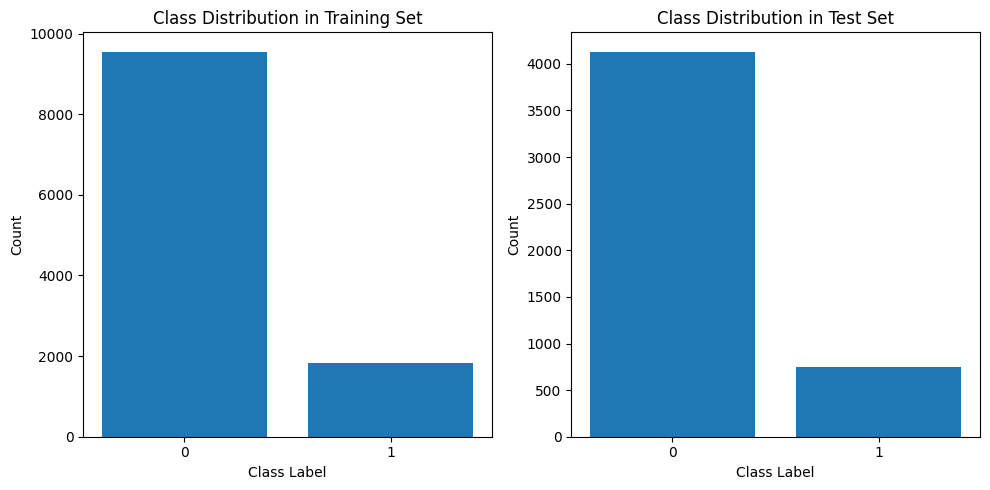

Setting class weigths to: {0: 0.5958137100994244, 1: 3.1092299290005463}


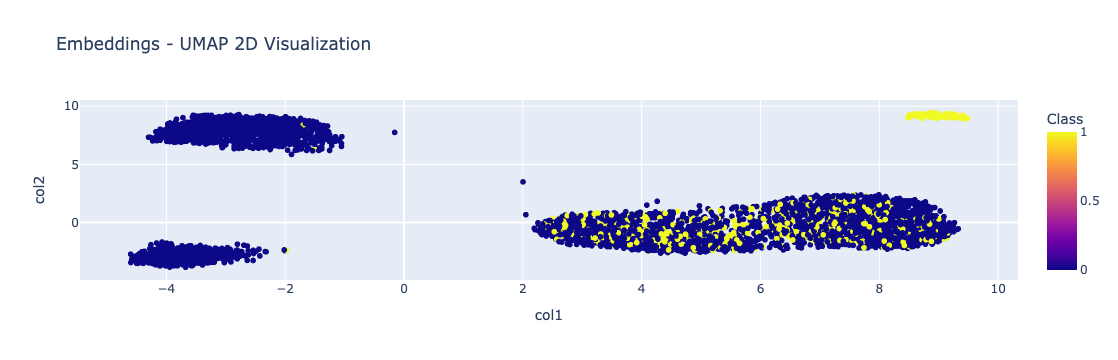

####################  SVM  ####################


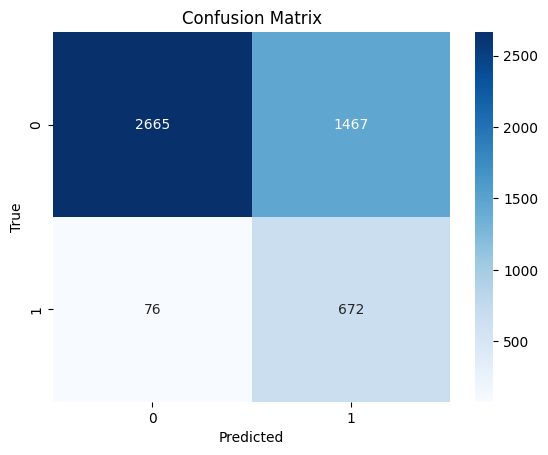

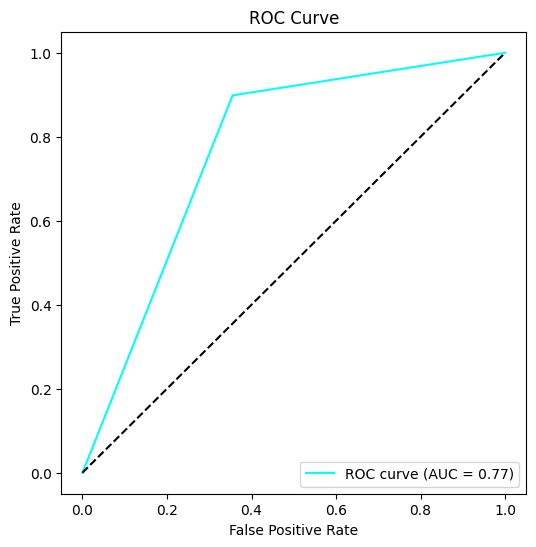

              precision    recall  f1-score   support

           0       0.97      0.64      0.78      4132
           1       0.31      0.90      0.47       748

    accuracy                           0.68      4880
   macro avg       0.64      0.77      0.62      4880
weighted avg       0.87      0.68      0.73      4880

####################  Logistic Regression  ####################


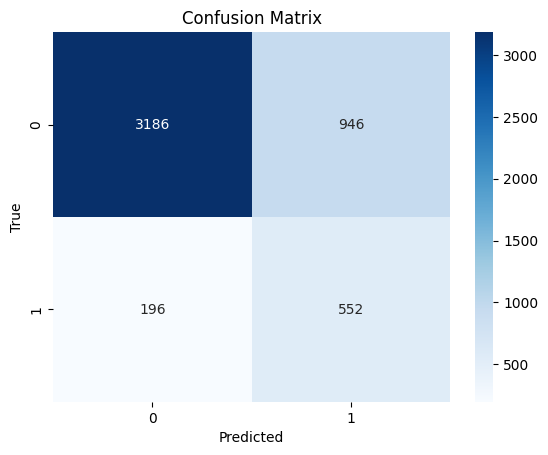

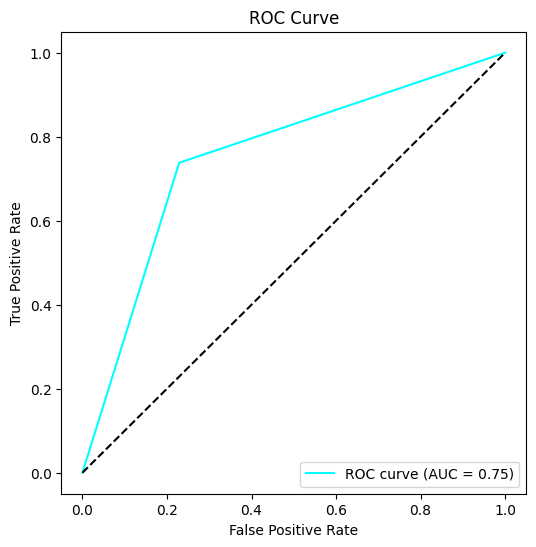

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      4132
           1       0.37      0.74      0.49       748

    accuracy                           0.77      4880
   macro avg       0.66      0.75      0.67      4880
weighted avg       0.85      0.77      0.79      4880



In [6]:
run_experiments(LABELS_PATH, LABEL, EMBEDDINGS_BACKBONE, EMBEDDINGS_DIR, TEST_SIZE, CLASS_WEIGTHS, NORMAL=NORMAL)

### Sex

In [7]:
# Constants:
LABEL = 'patient_sex'

Training set size is: 11386 rows and 768 columns
Test set size is: 4880 rows and 768 columns


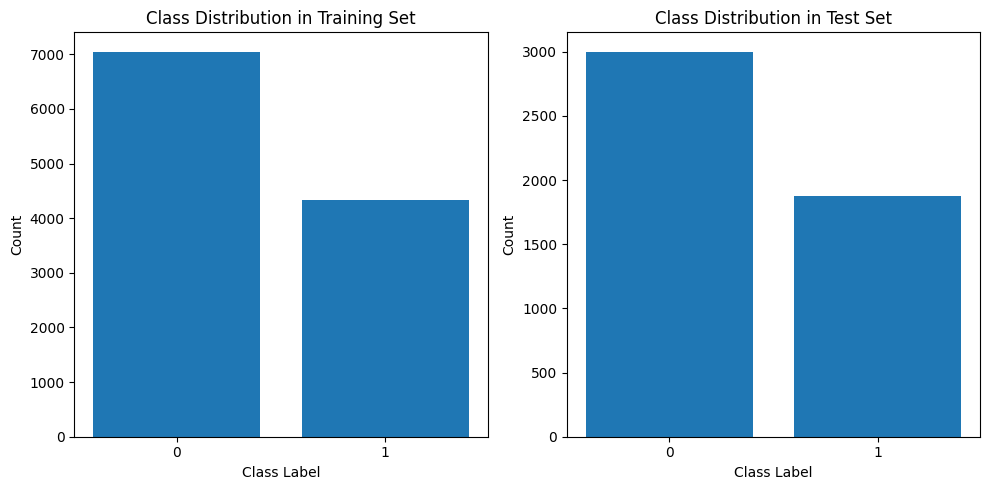

Setting class weigths to: {0: 0.8075177304964539, 1: 1.3129612546125462}


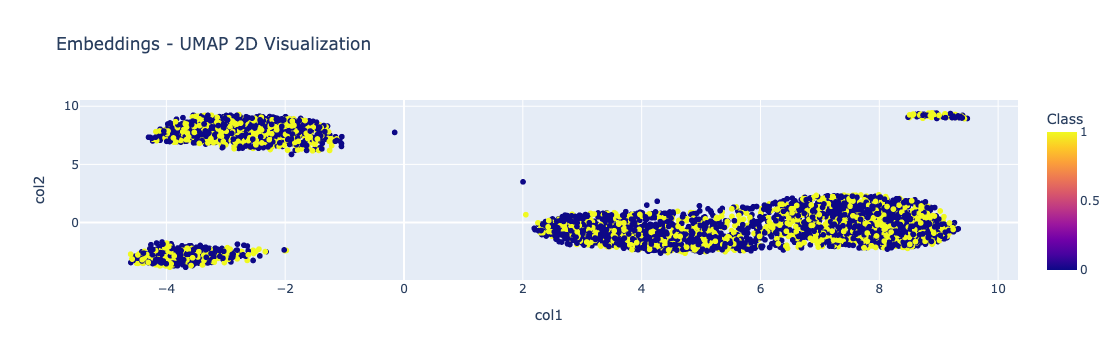

####################  SVM  ####################


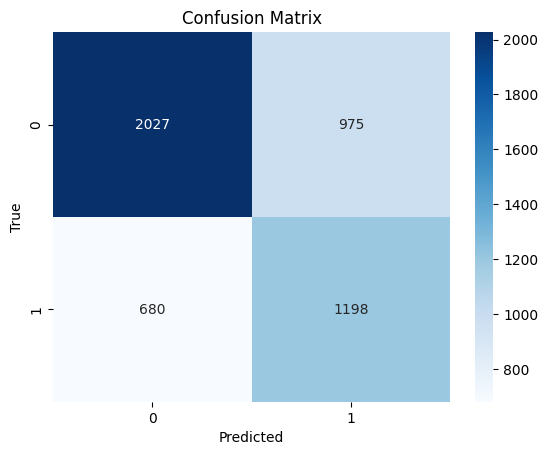

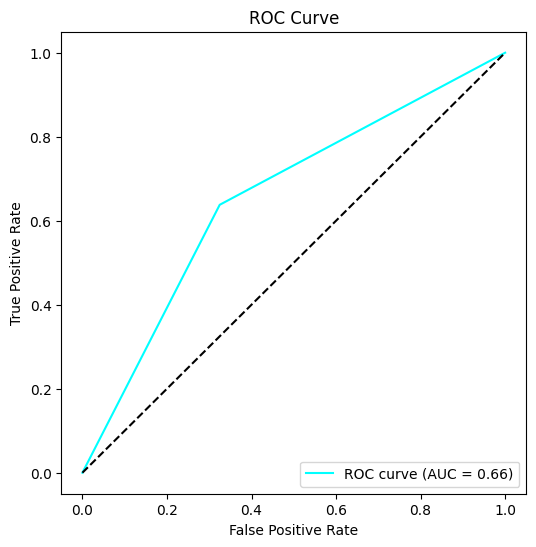

              precision    recall  f1-score   support

           0       0.75      0.68      0.71      3002
           1       0.55      0.64      0.59      1878

    accuracy                           0.66      4880
   macro avg       0.65      0.66      0.65      4880
weighted avg       0.67      0.66      0.66      4880

####################  Logistic Regression  ####################


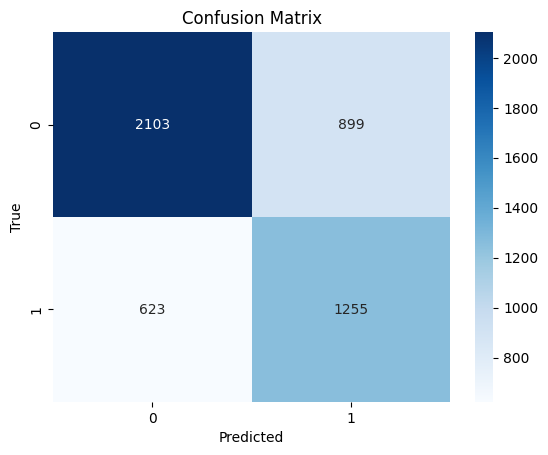

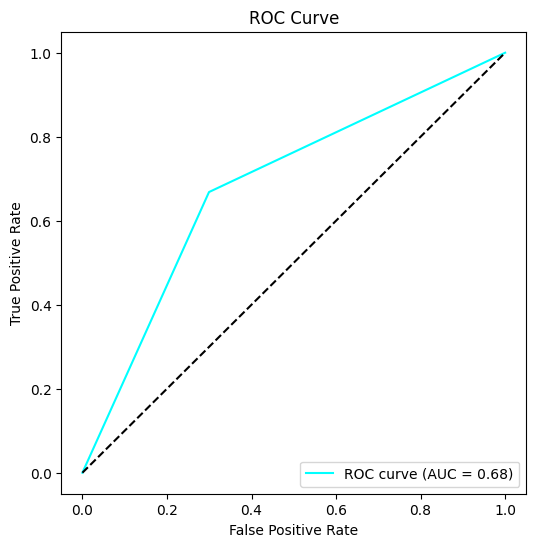

              precision    recall  f1-score   support

           0       0.77      0.70      0.73      3002
           1       0.58      0.67      0.62      1878

    accuracy                           0.69      4880
   macro avg       0.68      0.68      0.68      4880
weighted avg       0.70      0.69      0.69      4880



In [8]:
run_experiments(LABELS_PATH, LABEL, EMBEDDINGS_BACKBONE, EMBEDDINGS_DIR, TEST_SIZE, CLASS_WEIGTHS)

### Diabetic Retinopathy

In [9]:
LABEL = 'diabetic_retinopathy'

Training set size is: 11386 rows and 768 columns
Test set size is: 4880 rows and 768 columns


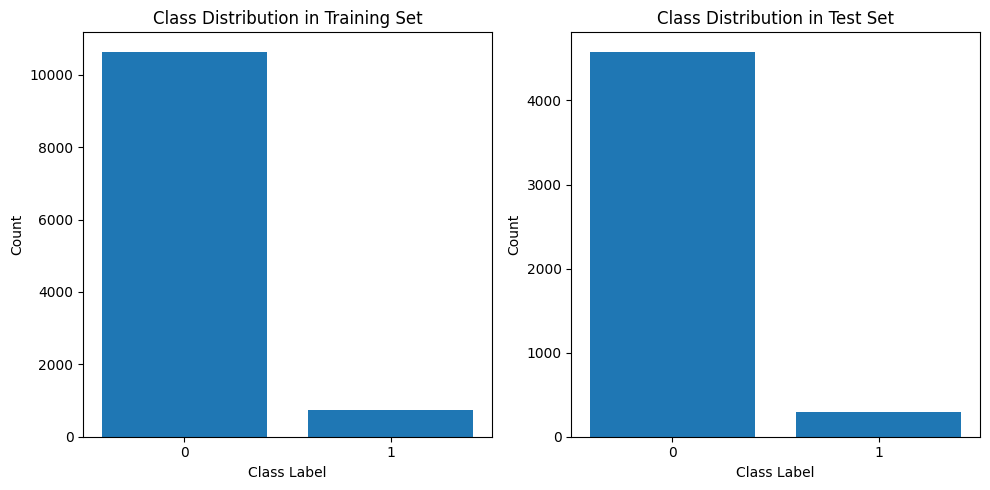

Setting class weigths to: {0: 0.5351066829589247, 1: 7.621151271753681}


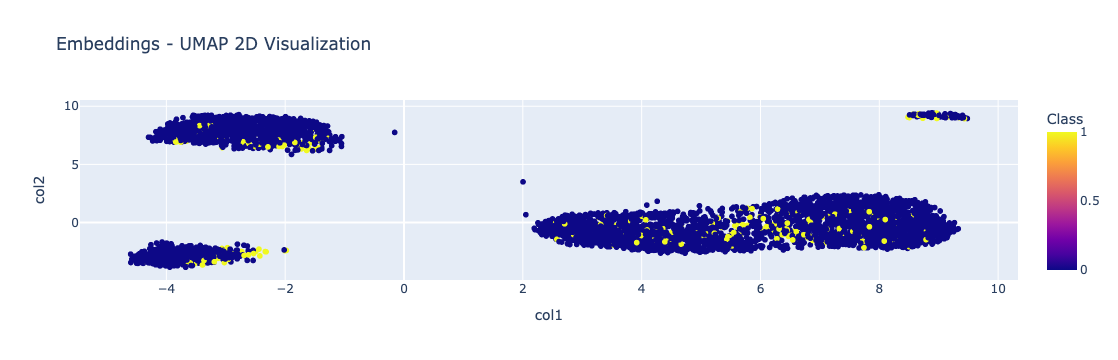

####################  SVM  ####################


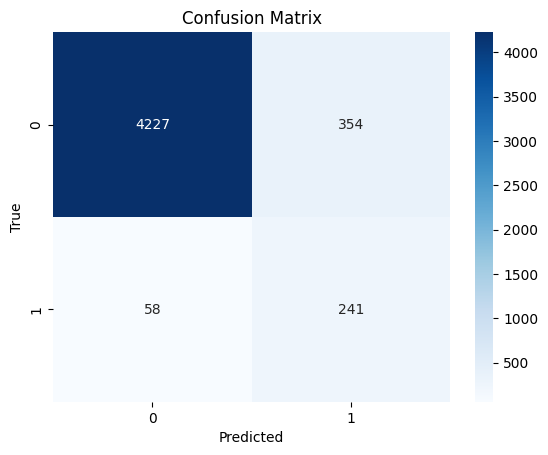

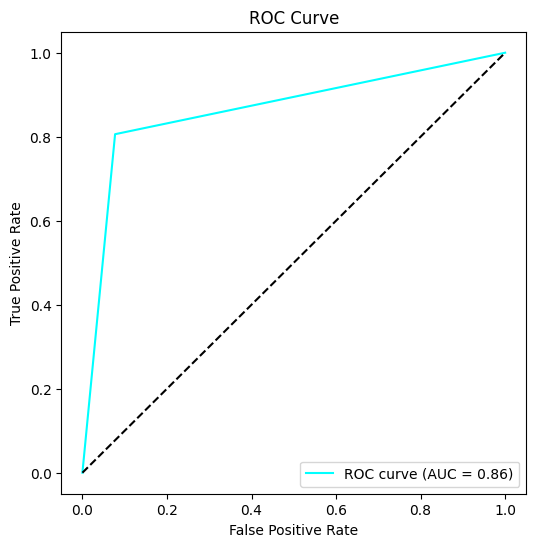

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      4581
           1       0.41      0.81      0.54       299

    accuracy                           0.92      4880
   macro avg       0.70      0.86      0.75      4880
weighted avg       0.95      0.92      0.93      4880

####################  Logistic Regression  ####################


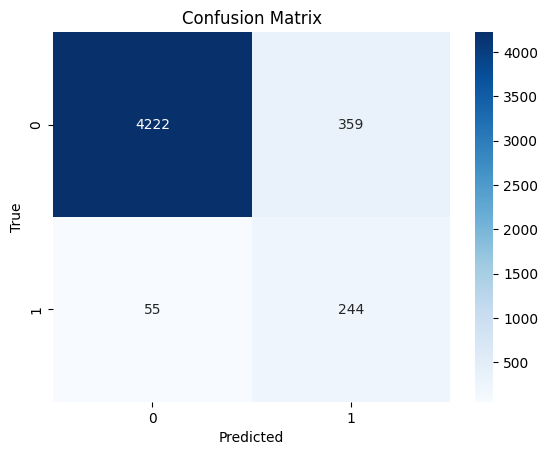

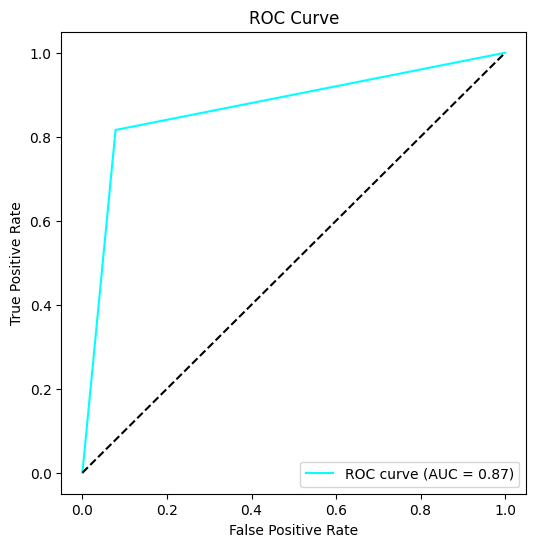

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      4581
           1       0.40      0.82      0.54       299

    accuracy                           0.92      4880
   macro avg       0.70      0.87      0.75      4880
weighted avg       0.95      0.92      0.93      4880



In [10]:
run_experiments(LABELS_PATH, LABEL, EMBEDDINGS_BACKBONE, EMBEDDINGS_DIR, TEST_SIZE, CLASS_WEIGTHS)